In [2]:
#Implemented by Umut Ekin Gezer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
import time
import math
import itertools
from itertools import chain
from statistics import mean
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.misc import imread

In [3]:
def clean_default(file_name,test_no):
    
    df=pd.read_csv(file_name,sep='/t')
    df=df["0/New Episode Begins: Default Start;"].str.split('/', expand=True)
    df.columns = ['Step', 'Location', 'Rotation', 'Default_Door']
    df["Trial_Number"] =None
    i=0
    for index, row in df.iterrows():
        if row.Location=="New Episode Begins: Default Start;":
            i=i+1
            df.loc[[index],["Trial_Number"]]=int(i)
        else:
            df.loc[[index],["Trial_Number"]]=int(i)
            
    df=df[df["Trial_Number"] % 2 ==1]
    df["Trial_Number"]=(df["Trial_Number"]+1)/2
    df["Trial_Number"]=df["Trial_Number"].astype(int)
    df=df.drop_duplicates(subset=['Step','Trial_Number'], keep='first')

    #For the Rooms(returns df_room):

    df_room=df[df["Rotation"].isna()]
    df_room=df_room[(df_room.Location != 'New Episode Begins: Default Start;')]
    df_room=df_room[["Location","Trial_Number"]]
    df_room = df_room.drop_duplicates(keep='first')
    df_room['Location'] = df_room['Location'].str.replace(' Room', ' ')
    df_room=df_room.rename(columns={"Location": "Room"})
    df_room['Room'] = df_room['Room'].str.replace('Correct', '')
    df_room['Room'] = df_room['Room'].str.replace('Incorrect', '')
    df_room['Room'] = df_room['Room'].str.replace(';', '')
    df_room['Room'] = df_room['Room'].str.replace(' ', '')
    df_room["Test_Number"]= test_no

    #For the Rotation and Location data
    df_physical=df.dropna()
    df_trial=df_physical["Trial_Number"]
    df_location=df_physical["Location"]
    df_rotation=df_physical["Rotation"]
    df_rotation = df_rotation.map(str).str.replace('(','').str.strip()
    df_rotation = df_rotation.map(str).str.replace(')','').str.strip()
    df_location = df_location.map(str).str.replace('(','').str.strip()
    df_location = df_location.map(str).str.replace(')','').str.strip()
    df_location=df_location.str.split(',', expand=True)
    df_rotation=df_rotation.str.split(',', expand=True)
    df_location.columns = ['X', 'Y', 'Z']
    df_rotation.columns = ['rotation_X', 'rotation_Y', 'rotation_Z']
    df_location = df_location.astype(float)
    df_rotation = df_rotation.astype(float)
    df_location=pd.concat([df_location,df_trial],axis=1)
    df_rotation=pd.concat([df_rotation,df_trial],axis=1)
    df_room.to_csv('RoomDefaultTest_'+str(test_no)+'.csv')
    df_location.to_csv('LocationDefaultTest_'+str(test_no)+'.csv')
    df_rotation.to_csv('RotationDefaultTest_'+str(test_no)+'.csv')
    
    
    return df_room, df_location, df_rotation


    
    

In [4]:
def clean_alternative(file_name,test_no):
    
    df=pd.read_csv(file_name,sep='/t')
    df=df["0/New Episode Begins: Alternative Start;"].str.split('/', expand=True)
    df.columns = ['Step', 'Location', 'Rotation', 'Default_Door']
    df["Trial_Number"] =None
    i=0
    for index, row in df.iterrows():
        if row.Location=="New Episode Begins: Alternative Start;":
            i=i+1
            df.loc[[index],["Trial_Number"]]=int(i)
        else:
            df.loc[[index],["Trial_Number"]]=int(i)
            
    df=df[df["Trial_Number"] % 2 ==1]
    df["Trial_Number"]=(df["Trial_Number"]+1)/2
    df["Trial_Number"]=df["Trial_Number"].astype(int)
    df=df.drop_duplicates(subset=['Step','Trial_Number'], keep='first')

    #For the Rooms(returns df_room):

    df_room=df[df["Rotation"].isna()]
    df_room=df_room[(df_room.Location != 'New Episode Begins: Alternative Start;')]
    df_room=df_room[["Location","Trial_Number"]]
    df_room = df_room.drop_duplicates(keep='first')
    df_room['Location'] = df_room['Location'].str.replace(' Room', ' ')
    df_room=df_room.rename(columns={"Location": "Room"})
    df_room['Room'] = df_room['Room'].str.replace('Correct', '')
    df_room['Room'] = df_room['Room'].str.replace('Incorrect', '')
    df_room['Room'] = df_room['Room'].str.replace(';', '')
    df_room['Room'] = df_room['Room'].str.replace(' ', '')
    df_room["Test_Number"]= test_no

    #For the Rotation and Location data
    df_physical=df.dropna()
    df_trial=df_physical["Trial_Number"]
    df_location=df_physical["Location"]
    df_rotation=df_physical["Rotation"]
    df_rotation = df_rotation.map(str).str.replace('(','').str.strip()
    df_rotation = df_rotation.map(str).str.replace(')','').str.strip()
    df_location = df_location.map(str).str.replace('(','').str.strip()
    df_location = df_location.map(str).str.replace(')','').str.strip()
    df_location=df_location.str.split(',', expand=True)
    df_rotation=df_rotation.str.split(',', expand=True)
    df_location.columns = ['X', 'Y', 'Z']
    df_rotation.columns = ['rotation_X', 'rotation_Y', 'rotation_Z']
    df_location = df_location.astype(float)
    df_rotation = df_rotation.astype(float)
    df_location=pd.concat([df_location,df_trial],axis=1)
    df_rotation=pd.concat([df_rotation,df_trial],axis=1)
    df_room.to_csv('RoomAlternativeTest_'+str(test_no)+'.csv')
    df_location.to_csv('LocationAlternativeTest_'+str(test_no)+'.csv')
    df_rotation.to_csv('RotationAlternativeTest_'+str(test_no)+'.csv')
    
    return df_room, df_location, df_rotation


    
    

In [5]:
#Clean every data:
default_room_test_1,default_location_test_1,default_rotation_test_1=clean_default('Test_1_Default.csv',test_no=1)
alternative_room_test_1,alternative_location_test_1,alternative_rotation_test_1=clean_alternative('Test_1_Alternate.csv',test_no=1)

default_room_test_2,default_location_test_2,default_rotation_test_2=clean_default('Test_2_Default.csv',test_no=2)
alternative_room_test_2,alternative_location_test_2,alternative_rotation_test_2=clean_alternative('Test_2_Alternate.csv',test_no=2)

default_room_test_3,default_location_test_3,default_rotation_test_3=clean_default('Test_3_Default.csv',test_no=3)
alternative_room_test_3,alternative_location_test_3,alternative_rotation_test_3=clean_alternative('Test_3_Alternate.csv',test_no=3)

default_room_test_4,default_location_test_4,default_rotation_test_4=clean_default('Test_4_Default.csv',test_no=4)
alternative_room_test_4,alternative_location_test_4,alternative_rotation_test_4=clean_alternative('Test_4_Alternate.csv',test_no=4)

default_room_test_5,default_location_test_5,default_rotation_test_5=clean_default('Test_5_Default.csv',test_no=5)
alternative_room_test_5,alternative_location_test_5,alternative_rotation_test_5=clean_alternative('Test_5_Alternate.csv',test_no=5)




/Users/umutekingezer/opt/anaconda3/envs/unity_rl/lib/python3.6/site-packages/ipykernel_launcher.py:3: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.

/Users/umutekingezer/opt/anaconda3/envs/unity_rl/lib/python3.6/site-packages/ipykernel_launcher.py:3: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.

/Users/umutekingezer/opt/anaconda3/envs/unity_rl/lib/python3.6/site-packages/ipykernel_launcher.py:3: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by 

# Heatmap for location:

/Users/umutekingezer/opt/anaconda3/envs/unity_rl/lib/python3.6/site-packages/seaborn/distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.45 for `bw_method`, but please see the docs for the new parameters and update your code.



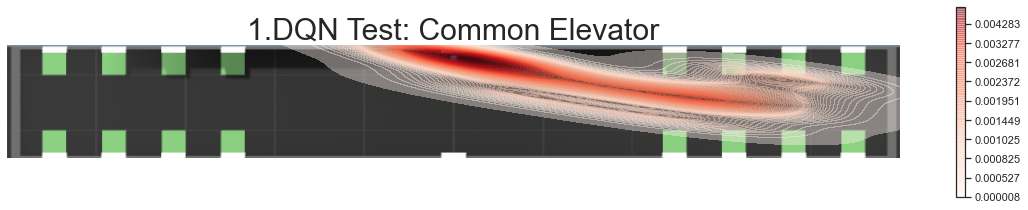

/Users/umutekingezer/opt/anaconda3/envs/unity_rl/lib/python3.6/site-packages/seaborn/distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.45 for `bw_method`, but please see the docs for the new parameters and update your code.



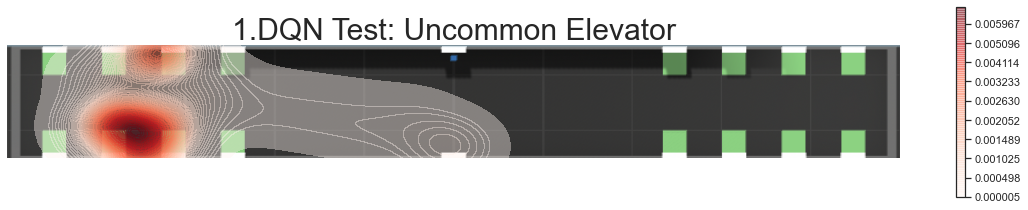

/Users/umutekingezer/opt/anaconda3/envs/unity_rl/lib/python3.6/site-packages/seaborn/distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.45 for `bw_method`, but please see the docs for the new parameters and update your code.



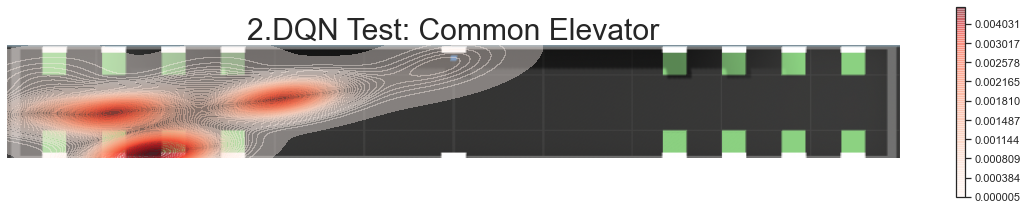

/Users/umutekingezer/opt/anaconda3/envs/unity_rl/lib/python3.6/site-packages/seaborn/distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.45 for `bw_method`, but please see the docs for the new parameters and update your code.



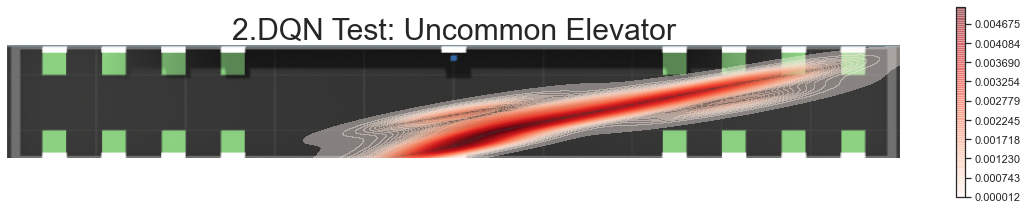

/Users/umutekingezer/opt/anaconda3/envs/unity_rl/lib/python3.6/site-packages/seaborn/distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.45 for `bw_method`, but please see the docs for the new parameters and update your code.



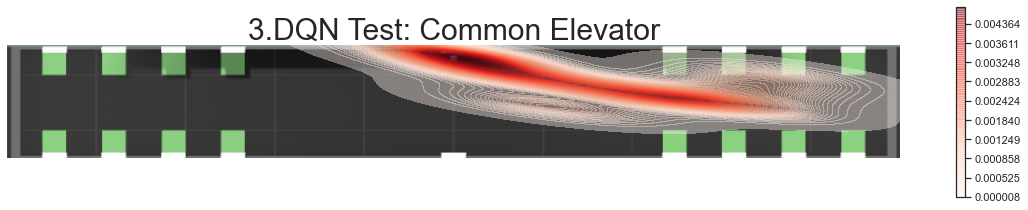

/Users/umutekingezer/opt/anaconda3/envs/unity_rl/lib/python3.6/site-packages/seaborn/distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.45 for `bw_method`, but please see the docs for the new parameters and update your code.



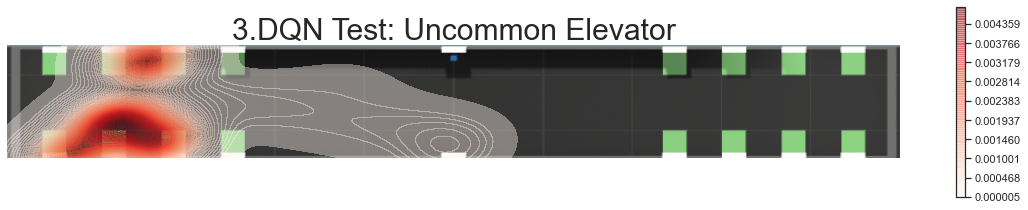

/Users/umutekingezer/opt/anaconda3/envs/unity_rl/lib/python3.6/site-packages/seaborn/distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.45 for `bw_method`, but please see the docs for the new parameters and update your code.



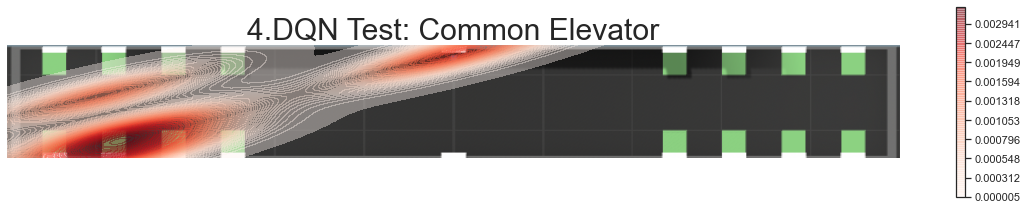

/Users/umutekingezer/opt/anaconda3/envs/unity_rl/lib/python3.6/site-packages/seaborn/distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.45 for `bw_method`, but please see the docs for the new parameters and update your code.



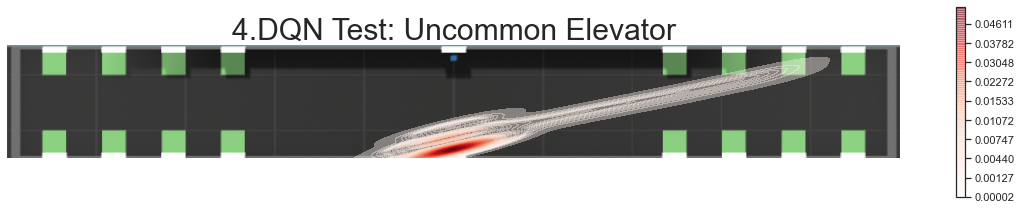

/Users/umutekingezer/opt/anaconda3/envs/unity_rl/lib/python3.6/site-packages/seaborn/distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.45 for `bw_method`, but please see the docs for the new parameters and update your code.



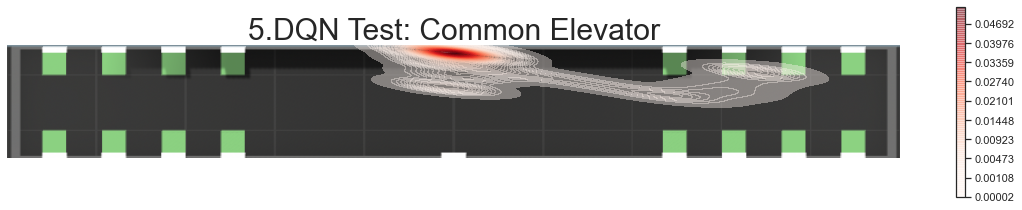

/Users/umutekingezer/opt/anaconda3/envs/unity_rl/lib/python3.6/site-packages/seaborn/distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.45 for `bw_method`, but please see the docs for the new parameters and update your code.



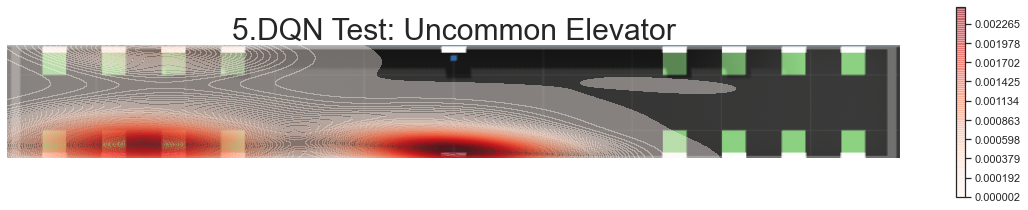

In [94]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.image as mpimg 
import seaborn as sns

data_list=[default_location_test_1,alternative_location_test_1,default_location_test_2,alternative_location_test_2,
          default_location_test_3,alternative_location_test_3,default_location_test_4,alternative_location_test_4,
          default_location_test_5,alternative_location_test_5]

default_location_test_1.name="1.DQN Test: Common Elevator"
alternative_location_test_1.name="1.DQN Test: Uncommon Elevator"
default_location_test_2.name="2.DQN Test: Common Elevator"
alternative_location_test_2.name="2.DQN Test: Uncommon Elevator"
default_location_test_3.name="3.DQN Test: Common Elevator"
alternative_location_test_3.name="3.DQN Test: Uncommon Elevator"
default_location_test_4.name="4.DQN Test: Common Elevator"
alternative_location_test_4.name="4.DQN Test: Uncommon Elevator"
default_location_test_5.name="5.DQN Test: Common Elevator"
alternative_location_test_5.name="5.DQN Test: Uncommon Elevator"



sns.set(style='white')
for data in data_list:

    plt.figure(figsize=(20, 10))
    hmax = sns.kdeplot(data=data,x="Z",y="X" ,cmap="Reds",shade=True, bw=0.45, thresh=0.001,cbar=True,cbar_kws={"shrink": .35}, alpha=0.4, cut=10,n_levels=100)
    plt.axis('off')
    map_img = mpimg.imread('HER.jpg') 
    plt.imshow(map_img, zorder=0, extent=[75,-75, -9.5, 9.5])
    plt.title(data.name,fontsize=30)
    plt.savefig("imgs/"+data.name+".png",bbox_inches='tight')
    plt.show()

# Room Error Occurences

In [85]:
room_dqn=pd.concat([default_room_test_1,alternative_room_test_1,default_room_test_2,alternative_room_test_2,
          default_room_test_3,alternative_room_test_3,default_room_test_4,alternative_room_test_4,
          default_room_test_5,alternative_room_test_5],ignore_index=True)

room_test_dqn=pd.concat([default_room_test_1,alternative_room_test_2,
          default_room_test_3,alternative_room_test_4,
          default_room_test_5],ignore_index=True)

room_anomaly_dqn=pd.concat([alternative_room_test_1,default_room_test_2,alternative_room_test_3,default_room_test_4,alternative_room_test_5],ignore_index=True)

In [86]:
def f(x):
  if x['Room'] == "310" or x['Room'] == "312" or x['Room'] == "314" or x['Room'] == "316"  : return 'Incorrect Corridor,Incorrect Side'
  elif x['Room'] == "301" or x['Room'] == "303" or x['Room'] == "305" or x['Room'] == "307"  : return 'Correct Corridor ,Correct Side'
  elif x['Room'] == "308" or x['Room'] == "302" or x['Room'] == "304" or x['Room'] == "306"  : return 'Correct Corridor,Incorrect Side'
  else   : return 'Incorrect Corridor,Correct Side'
    
    
  


room_dqn['Error_Type'] = room_dqn.apply(f, axis=1)
room_test_dqn['Error_Type'] = room_test_dqn.apply(f, axis=1)
room_anomaly_dqn['Error_Type'] = room_anomaly_dqn.apply(f, axis=1)

room_dqn['Algorithm'] = "DQN"
room_test_dqn['Algorithm'] = "DQN"
room_anomaly_dqn['Algorithm'] = "DQN"

In [87]:
room_sr=pd.read_csv('SR_test.csv')
room_test_sr=pd.read_csv('SR_trained_test.csv')
room_anomaly_sr=pd.read_csv('SR_notrained_test.csv')

In [88]:
room_df=pd.concat([room_dqn,room_sr],ignore_index=True)
room_test=pd.concat([room_test_dqn,room_test_sr],ignore_index=True)
room_anomaly=pd.concat([room_anomaly_dqn,room_anomaly_sr],ignore_index=True)

In [58]:
room_anomaly = room_anomaly[room_anomaly.Room != 303]
room_test = room_test[room_test.Room != 303]

In [59]:
room_anomaly = room_anomaly[room_anomaly.Room != "303"]
room_test = room_test[room_test.Room != "303"]

In [52]:
room_test=room_test.drop(room_test.Room="303"])

SyntaxError: invalid syntax (<ipython-input-52-63d19cfc867f>, line 1)

In [60]:
room_anomaly

,Room,Trial_Number,Test_Number,Error_Type,Algorithm,Unnamed: 0
0,314,1,1,"Incorrect Corridor,Incorrect Side",DQN,NaN
1,313,1,1,"Incorrect Corridor,Correct Side",DQN,NaN
2,311,1,1,"Incorrect Corridor,Correct Side",DQN,NaN
3,314,2,1,"Incorrect Corridor,Incorrect Side",DQN,NaN
4,313,2,1,"Incorrect Corridor,Correct Side",DQN,NaN
...,...,...,...,...,...,...
961,314,48,5,"Incorrect Corridor,Incorrect Side",SR,493.0
962,314,49,5,"Incorrect Corridor,Incorrect Side",SR,494.0
963,313,49,5,"Incorrect Corridor,Correct Side",SR,495.0
964,314,50,5,"Incorrect Corridor,Incorrect Side",SR,496.0


In [89]:
room_anomaly.drop(columns="Unnamed: 0")
room_test.drop(columns="Unnamed: 0")

,Room,Trial_Number,Test_Number,Error_Type,Algorithm
0,303,1,1,"Correct Corridor ,Correct Side",DQN
1,303,2,1,"Correct Corridor ,Correct Side",DQN
2,303,3,1,"Correct Corridor ,Correct Side",DQN
3,303,4,1,"Correct Corridor ,Correct Side",DQN
4,303,5,1,"Correct Corridor ,Correct Side",DQN
...,...,...,...,...,...
450,303,46,5,"Correct Corridor ,Correct Side",SR
451,303,47,5,"Correct Corridor ,Correct Side",SR
452,303,48,5,"Correct Corridor ,Correct Side",SR
453,303,49,5,"Correct Corridor ,Correct Side",SR


In [64]:
room_test

,Room,Trial_Number,Test_Number,Error_Type,Algorithm,Unnamed: 0
309,307,40,2,"Correct Corridor ,Correct Side",SR,89.0
364,306,50,3,"Correct Corridor,Incorrect Side",SR,144.0


/Users/umutekingezer/opt/anaconda3/envs/unity_rl/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning:

FixedFormatter should only be used together with FixedLocator



<Figure size 1440x576 with 0 Axes>

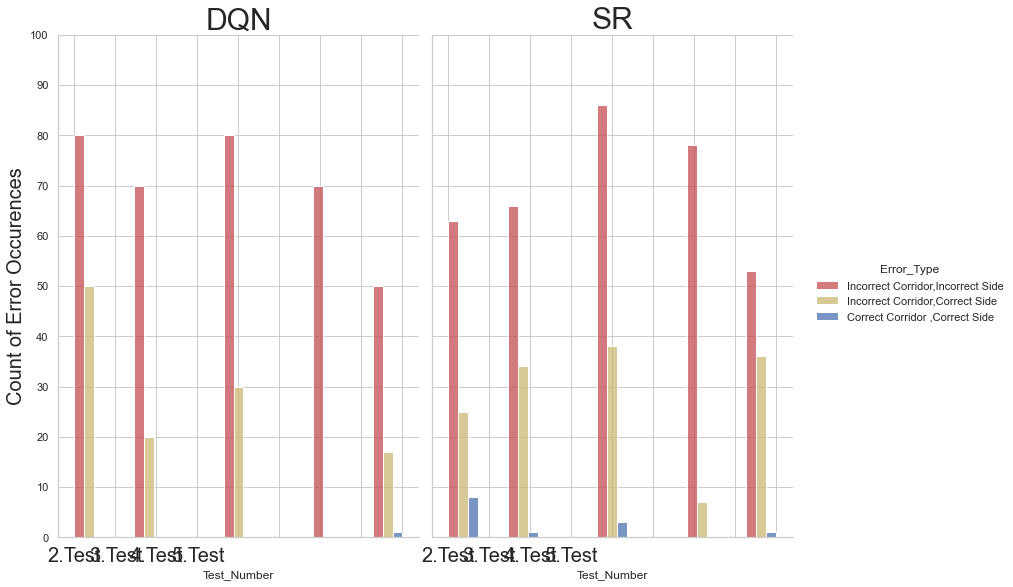

In [91]:
from plotly.subplots import make_subplots
sns.set(style='whitegrid')
plt.figure(figsize=(20, 8))
g=sns.displot(data=room_anomaly, x=room_anomaly["Test_Number"] ,hue="Error_Type",multiple="dodge",col="Algorithm"
            ,palette=["r","y","b"],height=8,aspect=.7)

y_ticks=range(0,110,10)
x_labels=["1.Test","2.Test","3.Test","4.Test","5.Test"]

for (col_key),ax in g.axes_dict.items():
    ax.set_title(col_key,fontsize=30)
    ax.set_yticks(y_ticks)
    ax.set_ylabel('Count of Error Occurences',size=20)
    ax.set_xticklabels(x_labels,size=20)
  
plt.savefig("Room_Errors_Anomaly")

In [95]:

room_anomaly




,Room,Trial_Number,Test_Number,Error_Type,Algorithm,Unnamed: 0
0,314,1,1,"Incorrect Corridor,Incorrect Side",DQN,NaN
1,313,1,1,"Incorrect Corridor,Correct Side",DQN,NaN
2,311,1,1,"Incorrect Corridor,Correct Side",DQN,NaN
3,314,2,1,"Incorrect Corridor,Incorrect Side",DQN,NaN
4,313,2,1,"Incorrect Corridor,Correct Side",DQN,NaN
...,...,...,...,...,...,...
962,314,49,5,"Incorrect Corridor,Incorrect Side",SR,494.0
963,313,49,5,"Incorrect Corridor,Correct Side",SR,495.0
964,314,50,5,"Incorrect Corridor,Incorrect Side",SR,496.0
965,313,50,5,"Incorrect Corridor,Correct Side",SR,497.0


In [ ]:
y_ticks=range(0,110,10)
x_labels=["1.Test","2.Test","3.Test","4.Test","5.Test"]

for (col_key),ax in g.axes_dict.items():
    ax.set_title(col_key,fontsize=30)
    ax.set_yticks(y_ticks)
    ax.set_xlabel(x_labels)
    ax.set_ylabel('Count of Error Occurences',size=20)
    ax.set_xticklabels(x_labels,size=20)
  
plt.savefig("Room_Errors_Anomaly")

<Figure size 1440x576 with 0 Axes>

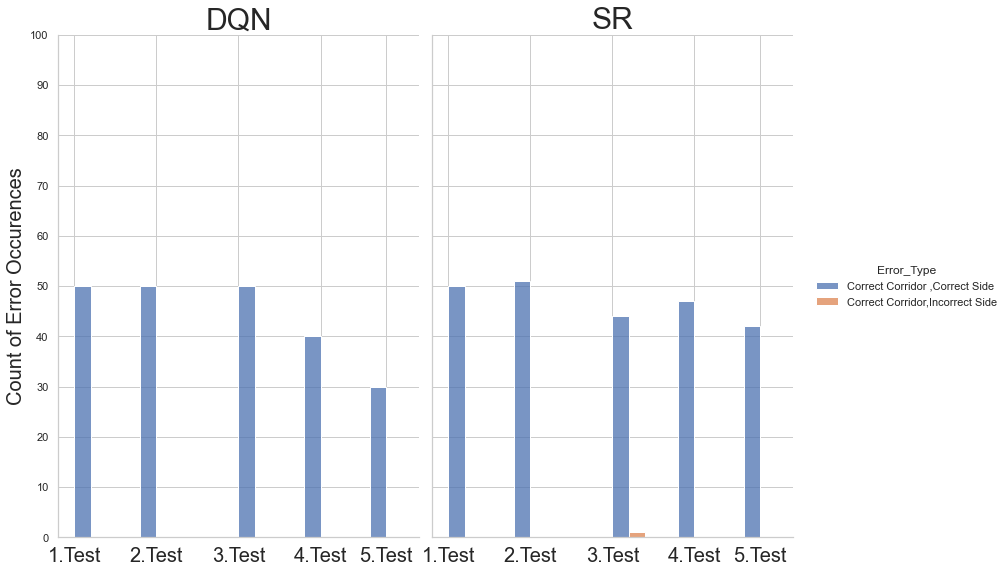

In [92]:
sns.set(style='whitegrid')
plt.figure(figsize=(20, 8))
g=sns.displot(data=room_test, x=room_test["Test_Number"] ,hue="Error_Type",multiple="dodge",col="Algorithm"
            ,height=8,aspect=.7)

y_ticks=range(0,110,10)
x_labels=["1.Test","2.Test","3.Test","4.Test","5.Test"]
x_ticks=[1,2,3,4,4.8]
for (col_key),ax in g.axes_dict.items():
    ax.set_title(col_key,fontsize=30)
    ax.set_yticks(y_ticks)
    ax.set_xlabel('')
    ax.set_ylabel('Count of Error Occurences',size=20)
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_labels,size=20)
    
    
     
plt.savefig("Room_Errors_Test")



<Figure size 1440x576 with 0 Axes>

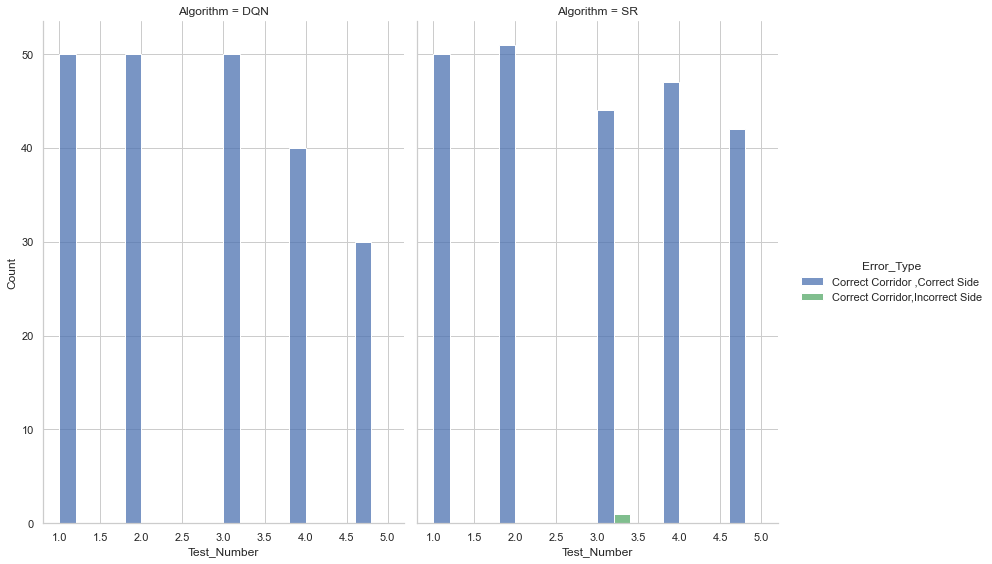

In [261]:
sns.set(style='whitegrid')
plt.figure(figsize=(20, 8))
sns.displot(data=room_test, x= room_test["Test_Number"] ,hue="Error_Type", col="Algorithm",multiple="dodge",palette=["b","g"],height=8,aspect=.7)

In [59]:
alternative_room_test_1.loc[alternative_room_test_1['Room']=="314"]

,Room,Trial_Number,Error_Type


In [63]:
alternative_room_test_1.dtypes

Room            object
Trial_Number     int64
Error_Type      object
dtype: object

In [101]:
default_room_test_1["Type"]="Default_T1"
alternative_room_test_1["Type"]="Alternative_T1"
default_room_test_2["Type"]="Default_T2"
alternative_room_test_2["Type"]="Alternative_T2"
default_room_test_3["Type"]="Default_T3"
alternative_room_test_3["Type"]="Alternative_T3"


In [132]:
df_room=pd.concat([default_room_test_1,alternative_room_test_1,default_room_test_2,alternative_room_test_2,default_room_test_3,alternative_room_test_3],axis=0,ignore_index=True)



In [138]:

df_room['Room'] = df_room['Room'].str.replace('Correct', '')

In [142]:
df_room['Room'] = df_room['Room'].str.replace('Incorrect', '')

In [146]:
df_room['Room'] = df_room['Room'].str.replace(';', '')

In [147]:
df_room

,Room,Trial_Number,Type
0,303,1,Default_T1
1,303,2,Default_T1
2,303,3,Default_T1
3,303,4,Default_T1
4,303,5,Default_T1
...,...,...,...
475,312,48,Alternative_T3
476,314,49,Alternative_T3
477,312,49,Alternative_T3
478,314,50,Alternative_T3


<AxesSubplot:xlabel='Room'>

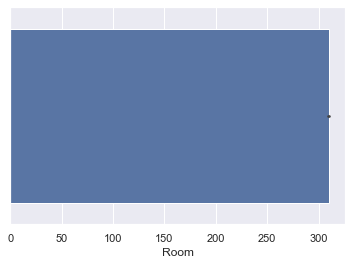

In [154]:
df_room["Room"]=df_room["Room"].astype(int)
sns.barplot(data=df_room,x="Room")

<AxesSubplot:xlabel='Room', ylabel='Count'>

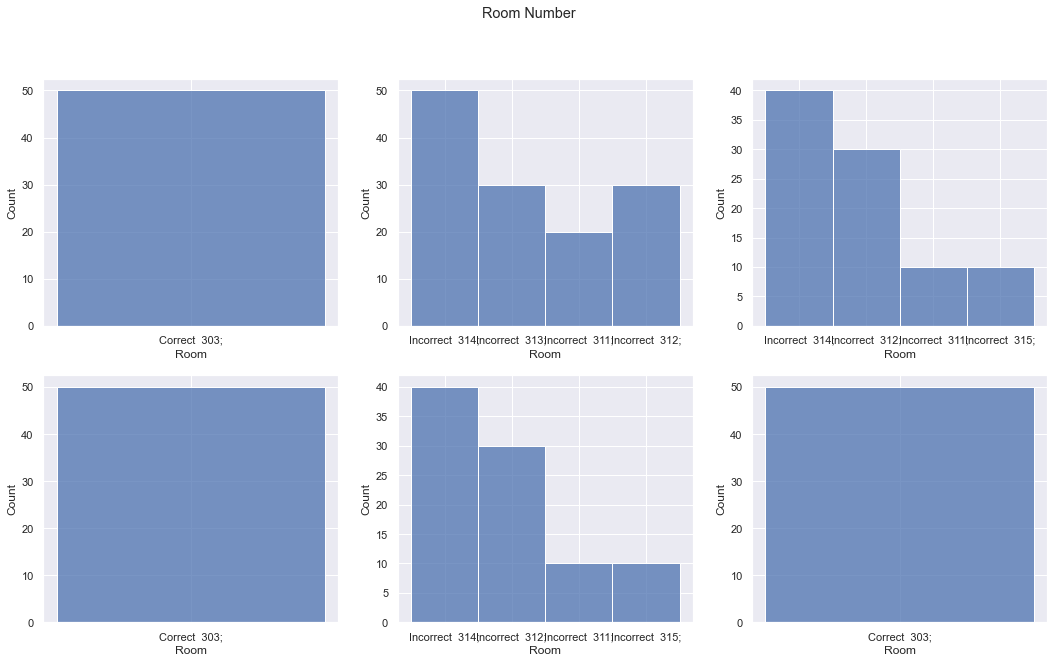

In [151]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('Room Number')

sns.histplot(ax=axes[0, 0], data=default_room_test_1, x='Room')
sns.histplot(ax=axes[0, 1], data=alternative_room_test_1, x='Room')
sns.histplot(ax=axes[0, 2], data=default_room_test_2, x='Room')
sns.histplot(ax=axes[1, 0], data=alternative_room_test_2, x='Room')
sns.histplot(ax=axes[1, 1], data=default_room_test_2, x='Room')
sns.histplot(ax=axes[1, 2], data=alternative_room_test_2, x='Room')

In [130]:
g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(, "total_bill", "tip", alpha=.7)
g.add_legend()

,Room,Trial_Number,Type
244,Incorrect 314;,1,Alternative_T1
391,Incorrect 313;,1,Alternative_T1
654,Incorrect 311;,1,Alternative_T1
6113,Incorrect 314;,2,Alternative_T1
6255,Incorrect 313;,2,Alternative_T1
...,...,...,...
262505,Incorrect 314;,46,Alternative_T1
268418,Incorrect 314;,47,Alternative_T1
274331,Incorrect 314;,48,Alternative_T1
280239,Incorrect 314;,49,Alternative_T1
